### MACHINE LEARNING MODELS FOR THE DIABETES DATASET (RAW)

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Ada Boosting
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

In [70]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("ignore")
warnings.simplefilter('ignore')

In [71]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import shap
import matplotlib.pyplot as plt
import seaborn as sns

**Set seeds for the different libraries that need it. To ensure reproducibility of the results**

In [72]:
random_seed = 14
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

**Load the dataset**

In [73]:
df = pd.read_csv("/home/carmen/Escritorio/TFM/ml_anonymization/datasets/diabetes_dataset/csv/diabetes_data_raw.csv", sep=",")

**We check that we have loaded the dataset correctly by showing the first 5 rows of the dataset**

In [74]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**We explore the original dataset**

In [75]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

**Check if there is any data that is null to eliminate it, if it exists:**

In [76]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Eliminate duplicate data if any**

In [77]:
df.drop_duplicates(inplace=True)

**Convert categorical variables to factors:**

In [78]:
df["Age"] = df["Age"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Polyuria"] = df["Polyuria"].astype("category").cat.codes
df["Polydipsia"] = df["Polydipsia"].astype("category").cat.codes
df["sudden weight loss"] = df["sudden weight loss"].astype("category").cat.codes  
df["weakness"] = df["weakness"].astype("category").cat.codes
df["Polyphagia"] = df["Polyphagia"].astype("category").cat.codes
df["Genital thrush"] = df["Genital thrush"].astype("category").cat.codes


df["visual blurring"] = df["visual blurring"].astype("category").cat.codes
df["Itching"] = df["Itching"].astype("category").cat.codes
df["Irritability"] = df["Irritability"].astype("category").cat.codes
df["delayed healing"] = df["delayed healing"].astype("category").cat.codes
df["partial paresis"] = df["partial paresis"].astype("category").cat.codes  
df["muscle stiffness"] = df["muscle stiffness"].astype("category").cat.codes
df["Alopecia"] = df["Alopecia"].astype("category").cat.codes
df["Obesity"] = df["Obesity"].astype("category").cat.codes

df["class"] = df["class"].astype("category").cat.codes

In [79]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**Next, we must do the scaling on train, we apply it, and we do the scaling again on test. We split the dataset into train and test**

In [80]:
X = df.drop(["class"], axis=1)
y = df["class"]

# We add stratify for making sure that the random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random.seed(random_seed), stratify=y)

In [81]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**We check that the shapes of the splitted sets are correct as expected**

In [82]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (188, 16)
X_test shape: (63, 16)
y_train: (188,)
y_test shape: (63,)


### LOGISTIC REGRESSION:  
#### Linear regression method for binary classification problems

 We create and train the logistic regression model

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We make the predictions on the test partition:

In [15]:
y_pred_logistic = model.predict(X_test)

We evaluate the model obtained:

In [16]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", report_logistic)

Accuracy: 0.9206349206349206
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.93      0.95      0.94        43

    accuracy                           0.92        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.92      0.92      0.92        63



In [17]:
y_pred_prob_logistic = model.predict_proba(X_test)[:, 1]
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)

print("AUC:", auc_logistic)


AUC: 0.9627906976744186


### KNN

We choose the different parameters for gridSearch

In [18]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [19]:
knn = KNeighborsClassifier()

We create the GridSearch object

In [20]:
# refit equals true, to train with all the data
grid_search = GridSearchCV(knn, param_grid, cv=5, refit=True)

We make the model fit

In [21]:
grid_search.fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d22252d0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d2226320>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d22252d0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d2226320>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d22269e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d2226b00>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [22]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy score: 0.8940256045519204


Get the best model and its predictions

In [23]:
best_model_knn = grid_search.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d2226dd0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Evaluate the best model over test partition

In [24]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.95      0.84      0.89        43

    accuracy                           0.86        63
   macro avg       0.83      0.87      0.84        63
weighted avg       0.88      0.86      0.86        63



In [25]:
y_pred_prob_knn = best_model_knn.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

print("AUC:", auc_knn)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe9d22272e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


AUC: 0.9709302325581395


### CLASSIFICATION TREES

We choose the different parameters for gridSearch

In [26]:
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

We create the model classifier

In [27]:
model_ct = DecisionTreeClassifier(random_state=random_seed)

We create the GridSearch object

In [28]:
grid_search = GridSearchCV(model_ct, param_grid, cv=5)

We make the model fit

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=14),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

We obtain and store the best model and the prediction

In [30]:
best_model_ct = grid_search.best_estimator_
y_pred_ct = best_model_ct.predict(X_test)

Evaluate the best model

In [31]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.8412698412698413
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.90      0.86      0.88        43

    accuracy                           0.84        63
   macro avg       0.81      0.83      0.82        63
weighted avg       0.85      0.84      0.84        63



In [32]:
y_pred_prob_ct = best_model_ct.predict_proba(X_test)[:, 1]
auc_ct = roc_auc_score(y_test, y_pred_prob_ct)

print("AUC:", auc_ct)


AUC: 0.9482558139534885


### RANDOM FOREST

We choose the different parameters for gridSearch

In [83]:
param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [84]:
rfc = RandomForestClassifier(random_state=random_seed)

We create the GridSearch object

In [85]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)

We make the model fit

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [87]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy score: 0.9204836415362732


In [88]:
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [89]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.93      1.00      0.97        43

    accuracy                           0.95        63
   macro avg       0.97      0.93      0.94        63
weighted avg       0.96      0.95      0.95        63



In [90]:
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("AUC:", auc_rf)


AUC: 0.9825581395348837


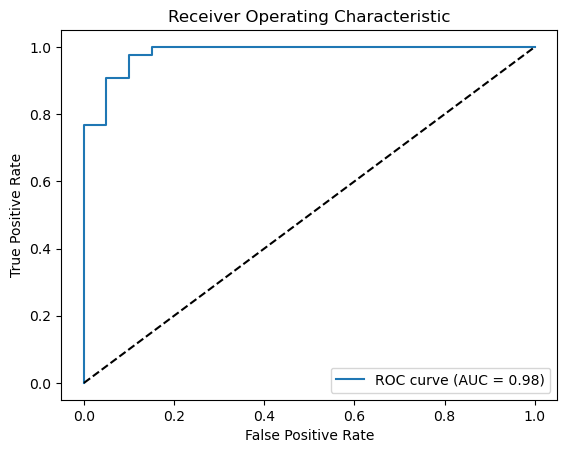

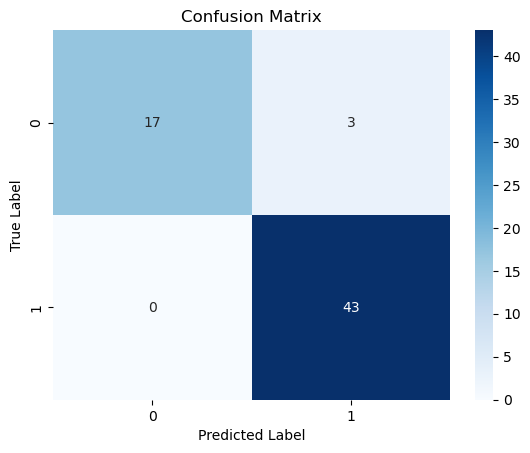

In [91]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### SVM (Support Vector Machine)

In [41]:
param_grid = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [42]:
svm = SVC(random_state=random_seed)

In [43]:
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=14),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [45]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy score: 0.9099573257467994


In [46]:
best_model_svm = grid_search.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [47]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Best Parameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9206349206349206
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.93      0.95      0.94        43

    accuracy                           0.92        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.92      0.92      0.92        63



In [48]:
y_pred_prob_svm = best_model_svm.decision_function(X_test)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

print("AUC:", auc_svm)

AUC: 0.9627906976744186


### NEURAL NETWORK:

We start creating the model function

In [49]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search = GridSearchCV(model_nn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search.best_params_
best_params_nn

Epoch 1/10


2023-07-07 11:26:21.010024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6960
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7040
Epoch 3/10
8/8 [==============================] - 0s 952us/step - loss: 0.4761 - accuracy: 0.7040
Epoch 4/10
8/8 [==============================] - 0s 977us/step - loss: 0.4370 - accuracy: 0.7040
Epoch 5/10
8/8 [==============================] - 0s 925us/step - loss: 0.3955 - accuracy: 0.8080
Epoch 6/10
8/8 [==============================] - 0s 917us/step - loss: 0.3529 - accuracy: 0.8640
Epoch 7/10
8/8 [==============================] - 0s 941us/step - loss: 0.3188 - accuracy: 0.8880
Epoch 8/10
8/8 [==============================] - 0s 926us/step - loss: 0.2848 - accuracy: 0.9040
Epoch 9/10
8/8 [==============================] - 0s 922us/step - loss: 0.2607 - accuracy: 0.8960
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8730
Epoch 1/10
8/8 [====================

8/8 [==============================] - 0s 974us/step - loss: 0.1532 - accuracy: 0.9520
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8413
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7143
Epoch 2/10
8/8 [==============================] - 0s 917us/step - loss: 0.4720 - accuracy: 0.7143
Epoch 3/10
8/8 [==============================] - 0s 938us/step - loss: 0.4093 - accuracy: 0.7302
Epoch 4/10
8/8 [==============================] - 0s 908us/step - loss: 0.3353 - accuracy: 0.8492
Epoch 5/10
8/8 [==============================] - 0s 901us/step - loss: 0.2790 - accuracy: 0.9127
Epoch 6/10
8/8 [==============================] - 0s 929us/step - loss: 0.2323 - accuracy: 0.9286
Epoch 7/10
8/8 [==============================] - 0s 932us/step - loss: 0.1920 - accuracy: 0.9444
Epoch 8/10
8/8 [==============================] - 0s 983us/step - loss: 0.1630 - accuracy: 0.9524
Epoch 9/10
8/8 [==================

8/8 [==============================] - 0s 898us/step - loss: 0.2083 - accuracy: 0.9280
Epoch 10/20
8/8 [==============================] - 0s 937us/step - loss: 0.1781 - accuracy: 0.9440
Epoch 11/20
8/8 [==============================] - 0s 932us/step - loss: 0.1539 - accuracy: 0.9520
Epoch 12/20
8/8 [==============================] - 0s 940us/step - loss: 0.1365 - accuracy: 0.9600
Epoch 13/20
8/8 [==============================] - 0s 888us/step - loss: 0.1235 - accuracy: 0.9600
Epoch 14/20
8/8 [==============================] - 0s 872us/step - loss: 0.1070 - accuracy: 0.9760
Epoch 15/20
8/8 [==============================] - 0s 881us/step - loss: 0.0944 - accuracy: 0.9760
Epoch 16/20
8/8 [==============================] - 0s 914us/step - loss: 0.0835 - accuracy: 0.9760
Epoch 17/20
8/8 [==============================] - 0s 920us/step - loss: 0.0737 - accuracy: 0.9840
Epoch 18/20
8/8 [==============================] - 0s 858us/step - loss: 0.0651 - accuracy: 0.9840
Epoch 19/20
8/8 [=====

8/8 [==============================] - 0s 894us/step - loss: 0.0804 - accuracy: 0.9840
Epoch 20/30
8/8 [==============================] - 0s 913us/step - loss: 0.0699 - accuracy: 0.9920
Epoch 21/30
8/8 [==============================] - 0s 897us/step - loss: 0.0615 - accuracy: 0.9920
Epoch 22/30
8/8 [==============================] - 0s 855us/step - loss: 0.0547 - accuracy: 0.9920
Epoch 23/30
8/8 [==============================] - 0s 861us/step - loss: 0.0462 - accuracy: 0.9920
Epoch 24/30
8/8 [==============================] - 0s 899us/step - loss: 0.0413 - accuracy: 0.9920
Epoch 25/30
8/8 [==============================] - 0s 947us/step - loss: 0.0345 - accuracy: 0.9920
Epoch 26/30
8/8 [==============================] - 0s 855us/step - loss: 0.0305 - accuracy: 1.0000
Epoch 27/30
8/8 [==============================] - 0s 861us/step - loss: 0.0273 - accuracy: 1.0000
Epoch 28/30
8/8 [==============================] - 0s 902us/step - loss: 0.0233 - accuracy: 1.0000
Epoch 29/30
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9600
Epoch 11/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9680
Epoch 12/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9680
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9760
Epoch 14/30
8/8 [==============================] - 0s 925us/step - loss: 0.0842 - accuracy: 0.9840
Epoch 15/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9840
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9920
Epoch 17/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9920
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9920
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9920
Epoch 20/30
8/8 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7222
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7222
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7143
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7143
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7143
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7222
Epoch 8/10
4/4 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.7222
Epoch 9/10
4/4 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.7698
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8710
Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 0.7300 - accuracy: 0.3040
Epoch 2/10
4/4 [==============================] - 

4/4 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9520
Epoch 19/20
4/4 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.9600
Epoch 20/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9365
Epoch 1/20
4/4 [==============================] - 1s 1ms/step - loss: 0.6877 - accuracy: 0.5600
Epoch 2/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7280
Epoch 3/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.7040
Epoch 4/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7200
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7360
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.7760
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8720
Epoch 8/20
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8730
Epoch 1/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7222
Epoch 2/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7063
Epoch 3/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.7143
Epoch 4/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7143
Epoch 5/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7143
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7143
Epoch 7/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7143
Epoch 8/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.7143
Epoch 9/30
4/4 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.7460
Epoch 10/30
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9920
Epoch 24/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9920
Epoch 25/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9920
Epoch 26/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9920
Epoch 27/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9920
Epoch 28/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9920
Epoch 29/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9920
Epoch 30/30
2/2 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8730
Epoch 1/30
4/4 [==============================] - 1s 2ms/step - loss: 0.7121 - accuracy: 0.4444
Epoch 2/30
4/4 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.7540
Epoch 3/30
4/4 [============================

2/2 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7040
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7040
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7040
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7040
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7040
Epoch 10/10
1/1 [==============================] - 0s 62ms/step - loss: 0.4262 - accuracy: 0.6984
Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7823 - accuracy: 0.3360
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5040
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.7440
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6800
Epoch 5/10
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4160
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6560
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7760
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.8160
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8320
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.8160
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.8000
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7600
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7680
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7680
Epoch 14/20
2/2 [==============================

2/2 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7040
Epoch 7/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7040
Epoch 8/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7040
Epoch 9/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7120
Epoch 10/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7440
Epoch 11/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.7680
Epoch 12/30
2/2 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8000
Epoch 13/30
2/2 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8080
Epoch 14/30
2/2 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8480
Epoch 15/30
2/2 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8560
Epoch 16/30
2/2 [============================

2/2 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9286
Epoch 30/30
1/1 [==============================] - 0s 71ms/step - loss: 0.2443 - accuracy: 0.9032
Epoch 1/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4560
Epoch 2/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7040
Epoch 3/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7040
Epoch 4/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7040
Epoch 5/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7040
Epoch 6/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7040
Epoch 7/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7040
Epoch 8/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7040
Epoch 9/30
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.9048
Epoch 14/30
2/2 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.9048
Epoch 15/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.9127
Epoch 16/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8968
Epoch 17/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.8889
Epoch 18/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.8968
Epoch 19/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.8968
Epoch 20/30
2/2 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9127
Epoch 21/30
2/2 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9206
Epoch 22/30
2/2 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9286
Epoch 23/30
2/2 [=========================

{'batch_size': 16, 'epochs': 20, 'hidden_units': 256}

In [50]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/20
12/12 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.6755
Epoch 2/20
12/12 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.7181
Epoch 3/20
12/12 [==============================] - 0s 990us/step - loss: 0.3426 - accuracy: 0.8564
Epoch 4/20
12/12 [==============================] - 0s 974us/step - loss: 0.2591 - accuracy: 0.9096
Epoch 5/20
12/12 [==============================] - 0s 955us/step - loss: 0.2083 - accuracy: 0.9149
Epoch 6/20
12/12 [==============================] - 0s 932us/step - loss: 0.1809 - accuracy: 0.9202
Epoch 7/20
12/12 [==============================] - 0s 915us/step - loss: 0.1547 - accuracy: 0.9362
Epoch 8/20
12/12 [==============================] - 0s 869us/step - loss: 0.1339 - accuracy: 0.9521
Epoch 9/20
12/12 [==============================] - 0s 866us/step - loss: 0.1129 - accuracy: 0.9521
Epoch 10/20
12/12 [==============================] - 0s 911us/step - loss: 0.0978 - accuracy: 0.9681
Epo

In [51]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = best_model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % (accuracy*100))
print('Precision: %.2f' % (precision*100))
print('Recall: %.2f' % (recall*100))
print('F1-score: %.2f' % (f1*100))

2/2 [==============================] - 0s 2ms/step
Accuracy: 93.65
Precision: 93.33
Recall: 97.67
F1-score: 95.45


In [52]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy*100:.2f}%')

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'hidden_units': 256}
Test Accuracy: 93.65%


2/2 [==============================] - 0s 1ms/step


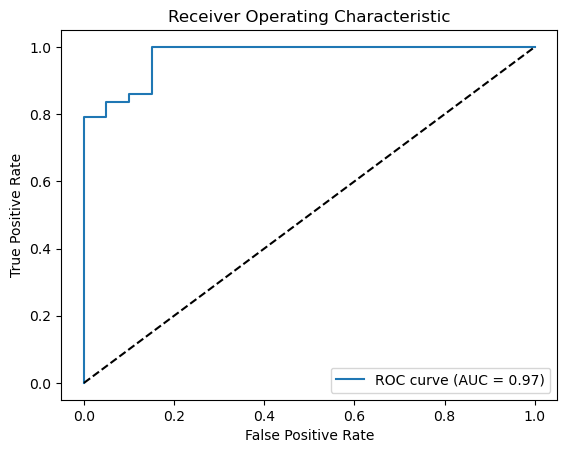

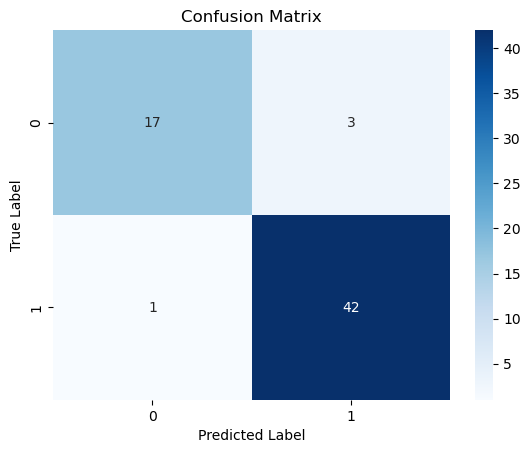

In [53]:
# Obtener las probabilidades de predicción
y_pred_prob_nn = best_model_nn.predict(X_test)

# Calcular la curva ROC y el AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

# Paso 6: Graficar la curva ROC
plt.plot(fpr_nn, tpr_nn, label='ROC curve (AUC = {:.2f})'.format(auc_nn))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Aplicar umbral a las probabilidades para obtener predicciones discretas
umbral = 0.5
y_pred_discreto_nn = np.where(y_pred_prob_nn >= umbral, 1, 0)


cm_nn = confusion_matrix(y_test, y_pred_discreto_nn)

# Visualize confusion matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



### AdaBoost (Adaptative Boosting):

In [54]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search = GridSearchCV(ada_boost, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy = best_ada_boost.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


Test Accuracy: 90.48%


In [55]:
best_params

{'learning_rate': 0.5, 'n_estimators': 100}

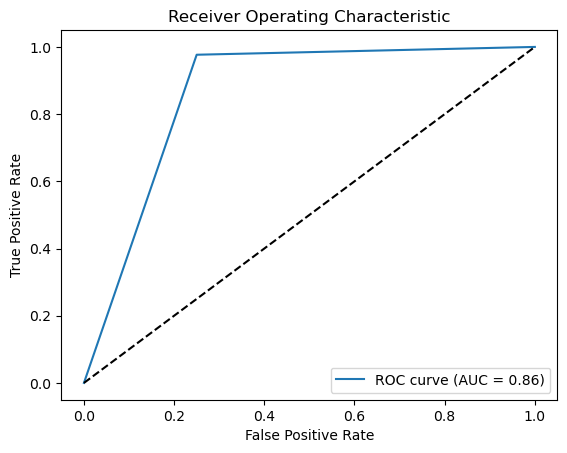

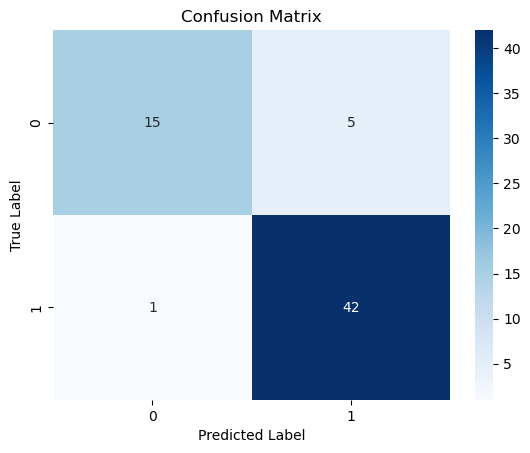

In [56]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_ada_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_ada_boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Gradient Boosting:

In [57]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 93.65%


In [58]:
best_params

{'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 100}

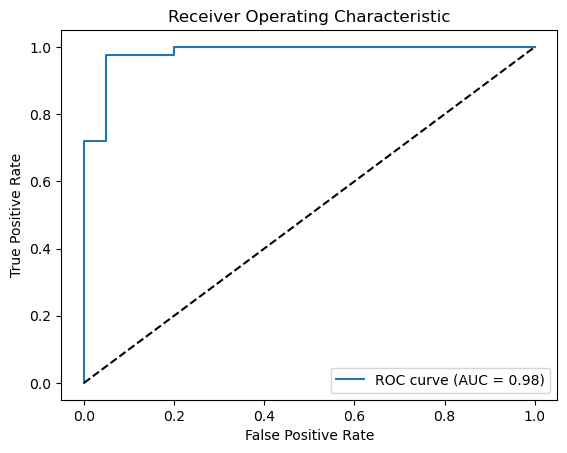

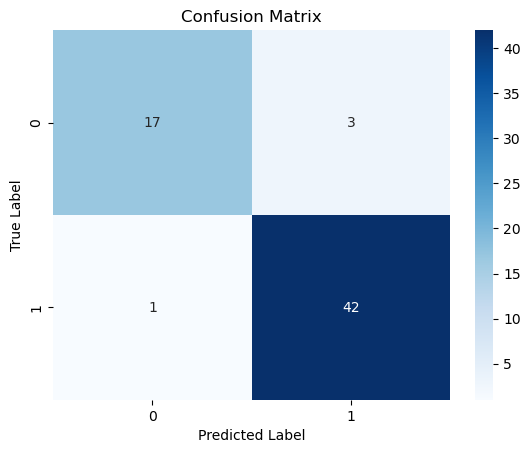

In [59]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_gradient_boosting.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Shap Values NN

In [60]:
# Inicializamoss SHAP explainer
explainer = shap.DeepExplainer(best_model_nn, X_train)
# Calculamos SHAP values
shap_values_nn = explainer.shap_values(X_test)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [61]:
df.keys()

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [62]:
df_shap_nn = pd.DataFrame(shap_values_nn[0], columns = df.keys()[:-1])
df_shap_nn.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.000090,-0.020428,-0.013372,0.206183,0.007086,-0.012676,-0.002847,0.031182,0.002400,0.061525,-0.009921,0.037936,0.006254,0.009729,0.006683,-0.006108
1,-0.008703,-0.068375,-0.184348,-0.154029,-0.039927,0.021825,-0.038534,-0.011370,-0.087638,-0.090572,-0.033877,0.020113,-0.012647,0.014684,-0.015986,-0.000616
2,-0.005386,-0.081407,-0.174206,0.332659,-0.027337,0.038964,-0.044406,-0.033316,0.002214,-0.205203,-0.054860,0.005493,0.017053,-0.005462,-0.031133,0.024298
3,0.011863,0.136153,-0.029246,-0.021167,0.112761,0.043305,-0.019283,-0.008578,0.094256,-0.073860,-0.007168,-0.028888,-0.010749,0.025741,0.048440,0.002885
4,0.038551,0.118289,-0.014915,0.172942,0.037846,-0.024680,-0.002193,0.030792,0.072354,-0.058937,-0.011802,0.035605,-0.010899,-0.066301,-0.009189,-0.004258


In [63]:
mean_shap_nn = df_shap_nn.abs().mean().values
mean_shap_nn

array([0.01045304, 0.05570571, 0.13517134, 0.10719578, 0.02809884,
       0.02412046, 0.02529477, 0.01527272, 0.03218926, 0.05597453,
       0.03767646, 0.01688154, 0.00834204, 0.01809878, 0.01661349,
       0.00740348])

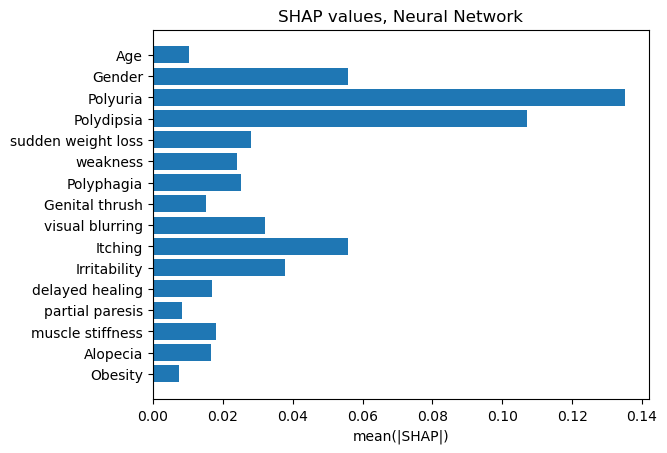

In [64]:
fig, ax = plt.subplots()

features = df.keys()[:-1]
y_pos = np.arange(len(features))

ax.barh(y_pos, mean_shap_nn, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|SHAP|)')
ax.set_title('SHAP values, Neural Network')

plt.show()


#### Shap values RF

In [65]:
explainer = shap.Explainer(best_model_rf, X_train, check_additivity=False)
shap_values_rf = explainer.shap_values(X_test, check_additivity=False)

In [66]:
df.keys()

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [67]:
df_shap_rf = pd.DataFrame(shap_values_rf[0], columns = df.keys()[:-1])
df_shap_rf.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.008520,0.022504,0.128071,-0.153787,0.002143,0.033690,0.009677,-0.008321,0.028909,-0.026317,0.031534,-0.040014,-0.005721,-0.006179,-0.007290,0.024193
1,-0.004985,0.030884,0.185682,0.131182,0.048215,-0.009550,0.034969,-0.000025,0.048558,0.033430,0.016487,-0.017239,-0.043594,-0.008808,0.007806,0.004615
2,-0.038564,0.018711,0.121052,-0.176730,0.021876,-0.027193,0.007178,0.003734,0.006222,0.032363,0.029793,-0.015121,0.002510,0.010920,0.011859,-0.009316
3,-0.016745,-0.083197,0.111037,0.091679,-0.113860,-0.018807,0.021013,-0.001478,-0.038854,0.031110,0.008358,0.004248,0.040205,-0.003027,-0.045553,0.003165
4,0.022769,-0.066815,0.102106,-0.110044,-0.074267,0.040654,0.013319,0.001118,-0.024649,0.027239,0.031108,-0.008123,0.014535,0.018001,0.019336,0.003008


In [68]:
mean_shap_rf = df_shap_rf.abs().mean().values
mean_shap_rf

array([0.0165749 , 0.03354459, 0.14476825, 0.10282801, 0.03175064,
       0.0154245 , 0.02375925, 0.00670461, 0.02393396, 0.02146653,
       0.02491974, 0.01118054, 0.01756178, 0.00719043, 0.018109  ,
       0.00680791])

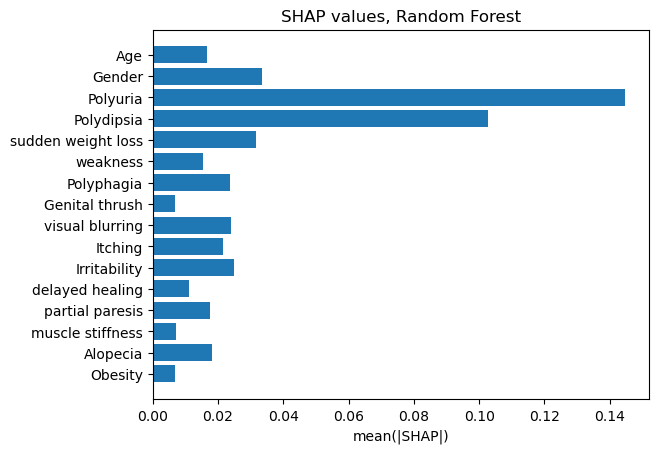

In [69]:
fig, ax = plt.subplots()

features = df.keys()[:-1]
y_pos = np.arange(len(features))

ax.barh(y_pos, mean_shap_rf, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|SHAP|)')
ax.set_title('SHAP values, Random Forest')

plt.show()
